In [1]:
import numpy as np
from dbgsom.dbgsom_ import DBGSOM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
data = scale(np.load("clusterable_data.npy"))
som = DBGSOM(
        n_epochs_max=100,
        sf=0.2,
        random_state=32
    )
som.fit(data)

 63%|██████▎   | 63/100 [00:02<00:01, 24.87 epochs/s]


DBGSOM(n_epochs_max=100, random_state=32, sf=0.2)

C:\Users\Sandro\AppData\Local\Temp\ipykernel_29148\4169971229.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<AxesSubplot: >

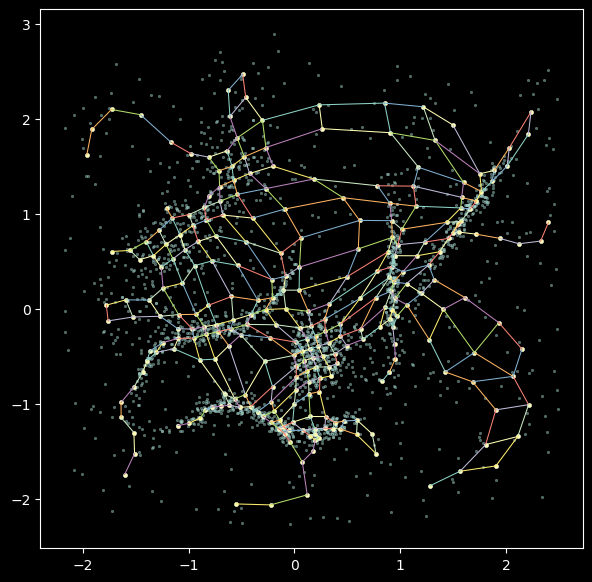

In [5]:
edges = list(som.som_.edges)
weights = som.weights_
plt.figure(figsize=(7, 7), edgecolor="red")
for edge in edges:
    sns.lineplot(
        x=[
            som.som_.nodes().data()[edge[0]]["weight"][0],
            som.som_.nodes().data()[edge[1]]["weight"][0],
        ],
        y=[
            som.som_.nodes().data()[edge[0]]["weight"][1],
            som.som_.nodes().data()[edge[1]]["weight"][1],
        ],
        size=1,
        legend=False,
        # hue=[4, 1]
    )
sns.scatterplot(x=data[:, 0], y=data[:, 1], s=4, alpha=0.5)
sns.scatterplot(
    x=weights[:, 0],
    y=weights[:, 1],
    # hue=np.array(list(dict(som.som_.nodes.data("error")).values())),
    palette="rocket",
    s=10
)
